In [68]:
import numpy as np
#import simpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
import cv2

import os
import random

In [51]:
dose = np.load('/home/peter/Documents/data/dose_test.npy')
pet = np.load('/home/peter/Documents/data/pet_test.npy')
ct = np.load('/home/peter/Documents/data/ct_test.npy')

In [79]:
pet2 = np.load('/home/peter/Documents/data_without_dose/pet_test.npy')
ct2 = np.load('/home/peter/Documents/data_without_dose/ct_test.npy')

In [78]:
del pet2, ct2

In [54]:
for x in range(40, 100):
    print(pet[x].mean())
    #print(dose[x].mean())
    print(ct[x].mean())
    print(" ")

50.524924892032146
-864.56435
 
50.62717177560032
-864.256625
 
52.714212325713035
-863.99215
 
52.36962353706956
-863.791975
 
51.53006969527304
-863.880675
 
50.51569822876751
-864.21435
 
49.81970424646437
-864.226325
 
51.03148925522268
-864.100775
 
52.49491828174293
-863.945225
 
54.65995261016786
-863.680125
 
58.169184516316655
-863.387375
 
60.94792583713234
-863.598725
 
67.05223140229583
-863.9163
 
70.4766905609101
-863.842975
 
74.23564579665363
-863.771575
 
73.05014725499153
-862.3358
 
70.26748941016197
-861.247625
 
73.43567259007692
-861.925825
 
76.92475631411374
-861.944875
 
75.77334021752775
-862.225625
 
74.00633416915834
-862.318775
 
78.21125883207917
-862.1898
 
81.73837915591598
-862.039825
 
84.92264300710559
-862.25455
 
104.48993804725707
-862.786975
 
132.37801652602553
-863.1316
 
162.32138770314754
-862.301375
 
177.6651917884469
-862.0021
 
200.35916851589084
-861.2233
 
223.2656985043913
-859.79845
 
229.66232057439984
-858.670175
 
228.78092647859157

In [39]:
def normalize_array(inp, img_size=81):
    array = inp.copy()
    for i in range(array.shape[0]):
        pic = array[i:(i+1),:,:]
        mask = (pic != 0.0)
        pic[mask] = ((pic[mask] - pic.min()) / (pic.max() - pic.min()))  # pic / np.linalg.norm(pic) -1 # 
        #pic[mask] = (pic[mask] - pic.mean()) / pic.std()
        #pic[mask] = ((pic[mask] - pic.min()) / (pic.max() - pic.min()))
        array[i:(i+1),:,:] = pic
    return array

In [104]:
def filter_zeros(array):
    bad_idx = []
    for i in range(array.shape[0]):
        if np.count_nonzero(array[i,:,:]) == 0:
            bad_idx.append(i)
    for idx in bad_idx:
        while True:
            rand_idx = random.choice(range(array.shape[0]))
            if rand_idx not in bad_idx: break
        array[idx] = array[rand_idx]
    return array

In [73]:
def upscale_array(array):
    out = np.empty((array.shape[0], 200, 200))
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        out[i,:,:] = cv2.resize(pic, dsize=(200, 200))
    return out

In [105]:
dose_norm = normalize_array(dose)
pet_norm = normalize_array(pet)

In [106]:
pet_norm = filter_zeros(pet_norm)

In [107]:
pet_norm.shape

(405, 128, 128)

In [108]:
count_pet = 0
count_dose = 0
for x in range(pet_norm.shape[0]):
    if np.count_nonzero(pet_norm[x]) == 0:
        count_pet += 1
    if np.count_nonzero(dose_norm[x]) == 0:
        count_dose += 1

In [110]:
count_dose

0

In [49]:
dose_norm.shape

(405, 128, 128)

/home/peter/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/peter/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/peter/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/peter/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/peter/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/peter/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/ma/core.py:718: UserWarning: Warning: converting a masked eleme

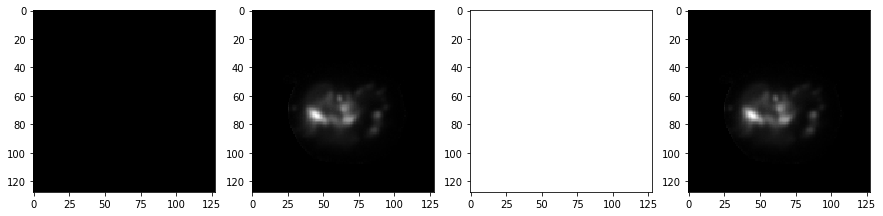

In [33]:
x = 64
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(pet[x], cmap="gray")
axes[1].imshow(dose[x], cmap="gray")
axes[2].imshow(pet_norm[x], cmap="gray")
axes[3].imshow(dose_norm[x], cmap="gray")

In [34]:
np.sum(np.isnan(pet_norm))

327680